### Import libs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

### Read data

In [3]:
cars_autolist_df = pd.read_csv("cars_autolist.csv")
cars_autolist_df.rename(columns={"driveline":"drivetrain"}, inplace=True)



In [4]:

cars_autolist_df=cars_autolist_df.drop(['condition','previous_price','engine_cylinders','model_id','quality_score','total_price_change','rear_wheel','heated_seats','leather'],axis=1)
cars_autolist_df

,id,vin,name,make_name,model_name,body_style,door_count,drivetrain,fuel_type,price,transmission,trim,year,normalized_color_exterior,normalized_color_interior,mileage
0,290391038,19XFL2H82NE015878,Honda Civic,Honda,Civic,hatchback,4.0,FWD,gasoline,22899,automatic,Sport,2022,gray,black,28389.0
1,285098214,3FA6P0LU5HR307508,Ford Fusion Hybrid,Ford,Fusion Hybrid,sedan,4.0,FWD,hybrid,14730,automatic,SE,2017,gray,NaN,45651.0
2,289346692,JF1GR89678L822739,Subaru Impreza,Subaru,Impreza,wagon,4.0,AWD,gasoline,21199,manual,WRX STI,2008,white,black,80786.0
3,288847695,JF1ZNAA13L9752660,Toyota 86,Toyota,86,coupe,2.0,RWD,gasoline,26999,manual,Base,2020,NaN,black,8713.0
4,283656004,JN1EV7AP0LM200887,Infiniti Q50,Infiniti,Q50,sedan,4.0,RWD,gasoline,28391,automatic,3.0T Sport,2020,white,gray,35839.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,289862734,3FMCR9C69RRE96707,Ford Bronco Sport,Ford,Bronco Sport,suv,4.0,AWD,gasoline,35685,automatic,Outer Banks,2024,white,black,NaN
9996,285981184,3FTTW8H3XRRA69266,Ford Maverick,Ford,Maverick,truck,4.0,FWD,hybrid,33975,automatic,XLT,2024,black,black,2.0
9997,289604941,1FA6P8CF3R5426727,Ford Mustang,Ford,Mustang,coupe,2.0,RWD,gasoline,44790,automatic,GT,2024,black,black,NaN
9998,289604942,1FA6P8CF6R5426432,Ford Mustang,Ford,Mustang,coupe,2.0,RWD,gasoline,53490,automatic,GT Premium,2024,black,black,NaN


In [5]:
def missing_values(df):
    print("Number of Missing Values in our data set\n")
    missing_df = df.isnull().sum().to_frame().reset_index().rename({"index" : 'Variable', 0: 'Missing Values'}, axis =1)
    display(missing_df.style.background_gradient('gnuplot2_r'))
    print("\n Percentage of Missing Values in our data set")
    display((df.isnull().sum() / (len(df.index)) * 100).head(20).to_frame().rename({0:'Count'}, axis = 1).style.background_gradient('gnuplot2_r'))
    round((df.isnull().sum() / (len(df.index)) * 100) , 2).plot(kind = 'barh',color ='maroon')

    plt.title("Percentage of Missing values")

### Preprocessing data

Number of Missing Values in our data set



,Variable,Missing Values
0,id,0
1,vin,0
2,name,0
3,make_name,0
4,model_name,0
5,body_style,9
6,door_count,459
7,drivetrain,28
8,fuel_type,459
9,price,0



 Percentage of Missing Values in our data set


,Count
id,0.000000
vin,0.000000
name,0.000000
make_name,0.000000
model_name,0.000000
body_style,0.090000
door_count,4.590000
drivetrain,0.280000
fuel_type,4.590000
price,0.000000


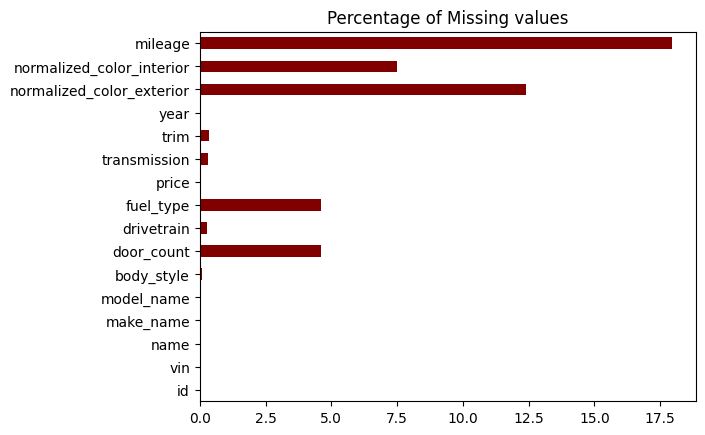

In [6]:
cars_autolist_df['drivetrain'] = cars_autolist_df['drivetrain'].str.replace(r'[^a-zA-Z0-9]', '', regex=True)
cars_autolist_df['drivetrain'] = cars_autolist_df['drivetrain'].str.replace(" ", "")
missing_values(cars_autolist_df)

In [7]:
columns_to_check = [
    'mileage', 'normalized_color_exterior', 'normalized_color_interior', 
    'door_count', 'body_style', 'drivetrain', 
    'fuel_type', 'transmission', 'trim'
]
cars_autolist_df = cars_autolist_df.dropna(subset=columns_to_check)


In [8]:
demo_df = pd.read_csv("cars_thecarconnection.csv")
demo_df.rename(columns={"doors":"door_count"}, inplace=True)
# demo1_df = pd.read_csv("demo 1.csv")
# demo1_df.rename(columns={"doors":"door_count"}, inplace=True)
# demo_df = pd.concat([demo_df, demo1_df])

print(len(demo_df))




109422


In [9]:

demo_df['drivetrain'] = demo_df['drivetrain'].str.replace(r'[^a-zA-Z0-9]', '', regex=True)
demo_df['drivetrain'] = demo_df['drivetrain'].replace('', np.nan)

In [10]:
columns_to_check = [
    'normalized_color_exterior', 'normalized_color_interior', 
    'door_count', 'body_style', 'fuel_type', 'transmission', 'trim', 'drivetrain'
]
demo_df = demo_df.dropna(subset=columns_to_check)



In [11]:
combined_df = pd.concat([demo_df, cars_autolist_df])
# combined_df = pd.merge(demo_df, cars_autolist_df, on='vin', how='outer')
print(len(combined_df))
# combined_df['id'].value_counts()
# combined_df['vin'].nunique()
# combined_df['vin'].value_counts()
df_deduplicated = combined_df.drop_duplicates(subset=['vin'], keep='first')
df_deduplicated.shape


91679


In [12]:
df_deduplicated = combined_df.drop_duplicates(subset=['vin'], keep='first')
df_deduplicated.shape

(91628, 16)

In [13]:
# df_deduplicated.to_csv('output.csv', index=False)
df = df_deduplicated
df = df[df['price'] > 0]
df['drivetrain'] = df['drivetrain'].str.replace(r'[^a-zA-Z0-9]', '', regex=True)
df['drivetrain'] = df['drivetrain'].str.replace(" ", "")
df = df.applymap(lambda s: s.lower() if type(s) == str else s)


In [14]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
categorical

['vin',
 'name',
 'make_name',
 'model_name',
 'transmission',
 'trim',
 'drivetrain',
 'normalized_color_exterior',
 'normalized_color_interior',
 'fuel_type',
 'body_style']

In [15]:
for col in categorical:
    print(col)
    # print(df[col].unique())
    print("Number of unique classes ",df[col].nunique())
    print('\n')

vin
Number of unique classes  90829


name
Number of unique classes  1265


make_name
Number of unique classes  61


model_name
Number of unique classes  1252


transmission
Number of unique classes  614


trim
Number of unique classes  5022


drivetrain
Number of unique classes  6


normalized_color_exterior
Number of unique classes  957


normalized_color_interior
Number of unique classes  568


fuel_type
Number of unique classes  9


body_style
Number of unique classes  12




In [16]:
df = df.drop(['id', 'vin'], axis=1)


In [17]:
df.shape

(90829, 14)

In [18]:
numerical = [col for col in df.columns if col not in categorical]
for i in numerical:
    df[df[i]<0]
    print("Records with Negative values in %s : " %i,df[df[i]<0])
    print('\n')

Records with Negative values in price :  Empty DataFrame
Columns: [name, make_name, model_name, price, transmission, trim, drivetrain, normalized_color_exterior, normalized_color_interior, fuel_type, door_count, body_style, mileage, year]
Index: []


Records with Negative values in door_count :  Empty DataFrame
Columns: [name, make_name, model_name, price, transmission, trim, drivetrain, normalized_color_exterior, normalized_color_interior, fuel_type, door_count, body_style, mileage, year]
Index: []


Records with Negative values in mileage :  Empty DataFrame
Columns: [name, make_name, model_name, price, transmission, trim, drivetrain, normalized_color_exterior, normalized_color_interior, fuel_type, door_count, body_style, mileage, year]
Index: []


Records with Negative values in year :  Empty DataFrame
Columns: [name, make_name, model_name, price, transmission, trim, drivetrain, normalized_color_exterior, normalized_color_interior, fuel_type, door_count, body_style, mileage, year]
In

In [19]:
df['drivetrain'].replace('unknown','awd', inplace=True)

In [20]:
df['door_count'].replace(0, 4, inplace=True)

In [21]:
# Xử lý dữ liệu xong ta lưu vào file để lưu lại
# Xóa tất cả dấu space thừa trong col drivetrain
df["drivetrain"] = df["drivetrain"].str.replace(r"[^a-zA-Z0-9]", "", regex=True)
df["drivetrain"] = df["drivetrain"].replace("", np.nan)
# loại bỏ các giá trị có giá bằng 0
df = df[df["price"] > 0]
# Thay các giá trị có cửa bằng 0 thành giá trị phổ biến nhất là 4
df["door_count"] = df["door_count"].replace(0, 4)
df["drivetrain"] = df["drivetrain"].replace("unknown", "awd")
# Xoa cac ky tu la
df["transmission"] = df["transmission"].str.replace(
    r"[^a-zA-Z0-9 ]", " ", regex=True
)
df["trim"] = df["trim"].str.replace(r"[^a-zA-Z0-9 ]", " ", regex=True)
df["normalized_color_exterior"] = df["normalized_color_exterior"].str.replace(
    r"[^a-zA-Z0-9 ]", " ", regex=True
)
df["normalized_color_interior"] = df["normalized_color_interior"].str.replace(
    r"[^a-zA-Z0-9 ]", " ", regex=True
)
# Chuyển dữ liệu về chữ cái thường
df = df.applymap(lambda s: s.lower() if type(s) == str else s)

# print("Dữ liệu đã được ghi ra file 'output.csv'")
# Lấy thời gian hiện tại và định dạng thành chuỗi
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")

# Tạo tên file với thông tin ngày giờ
file_name = f"output_{current_time}.csv"

# Ghi DataFrame đã gộp ra file CSV với tên file có chứa thông tin ngày giờ
df.to_csv(file_name, index=False)

print(f"Dữ liệu đã được gộp và ghi ra file '{file_name}'")

Dữ liệu đã được gộp và ghi ra file 'output_20240601_113520.csv'


In [22]:
# file_name = 'output.csv'
df = pd.read_csv(file_name)

df.shape

(90829, 14)

In [23]:
df['name'] = df['name'].astype('category').cat.codes + 1
df['make_name'] = df['make_name'].astype('category').cat.codes + 1
df['drivetrain'] = df['drivetrain'].astype('category').cat.codes + 1
df['model_name'] = df['model_name'].astype('category').cat.codes + 1
df['normalized_color_exterior'] = df['normalized_color_exterior'].astype('category').cat.codes + 1
df['transmission'] = df['transmission'].astype('category').cat.codes + 1
df['normalized_color_interior'] = df['normalized_color_interior'].astype('category').cat.codes + 1
df['fuel_type'] = df['fuel_type'].astype('category').cat.codes + 1
df['body_style'] = df['body_style'].astype('category').cat.codes + 1
df['trim'] = df['trim'].astype('category').cat.codes + 1

In [24]:
df.dtypes

name                           int16
make_name                       int8
model_name                     int16
price                          int64
transmission                   int16
trim                           int16
drivetrain                      int8
normalized_color_exterior      int16
normalized_color_interior      int16
fuel_type                       int8
door_count                   float64
body_style                      int8
mileage                      float64
year                           int64
dtype: object

In [25]:
df.head()

,name,make_name,model_name,price,transmission,trim,drivetrain,normalized_color_exterior,normalized_color_interior,fuel_type,door_count,body_style,mileage,year
0,357,12,656,12900,99,2276,3,371,100,5,4.0,10,62692.0,2017
1,954,37,1037,44900,165,3828,5,384,40,5,2.0,2,28842.0,2018
2,1178,58,607,23800,144,2642,3,927,422,5,4.0,10,81772.0,2018
3,912,37,517,79900,114,1275,3,927,43,5,4.0,10,35001.0,2018
4,889,37,284,18700,111,1745,3,75,43,4,4.0,9,26814.0,2018


In [26]:
df = df.astype(dtype={"door_count": np.int8, "mileage": np.int64})
df.dtypes

name                         int16
make_name                     int8
model_name                   int16
price                        int64
transmission                 int16
trim                         int16
drivetrain                    int8
normalized_color_exterior    int16
normalized_color_interior    int16
fuel_type                     int8
door_count                    int8
body_style                    int8
mileage                      int64
year                         int64
dtype: object

In [27]:
x = df[['name','make_name','model_name','fuel_type', 'transmission', 'drivetrain', 'normalized_color_exterior', 
        'normalized_color_interior', 'door_count', 'body_style', 'mileage', 'trim', 'year']].values
y = df['price'].values

print(x.shape)
print(y.shape)

(90829, 13)
(90829,)


### Training model

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error, r2_score
import pickle

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(72663, 13)
(72663,)
(18166, 13)
(18166,)


In [30]:
y_test

array([22193, 12495, 21609, ..., 28500, 15995, 31974], dtype=int64)

In [31]:
def best_para(model, param_grid):
    # Khởi tạo Grid Search CV với các tham số
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

    # Huấn luyện Grid Search CV trên dữ liệu huấn luyện
    grid_search.fit(x_train, y_train)

    # Hiển thị kết quả tốt nhất
    print("Best parameters found: ", grid_search.best_params_)
    print("Best score found: ", grid_search.best_score_)



In [32]:
# xgb = XGBRegressor(random_state=123)
# param_grid = {
#     "max_depth": [3, 5, 7],
#     "learning_rate": [0.1, 0.2, 0.3],
#     "n_estimators": [100, 500, 1000],
# }
# best_para(xgb, param_grid)

In [33]:
# rf = RandomForestRegressor(random_state=123)
# param_grid = {
#     "max_depth": [15, 25, 35],
#     "n_estimators": [200, 500, 800],
# }
# best_para(rf, param_grid)

In [34]:
# lgbm = LGBMRegressor(random_state=123)
# param_grid = {
#     "num_leaves": [500, 750, 100],
#     "learning_rate": [0.1, 0.2, 0.3],
#     "n_estimators": [200, 500, 800],
#     "max_bin": [1000, 1200, 1400]
# }
# best_para(lgbm, param_grid)

In [35]:
# RF model
rf = RandomForestRegressor(random_state = 123 , max_depth = 35 , n_estimators = 600)
rf.fit(x_train,y_train)


RandomForestRegressor(max_depth=35, n_estimators=600, random_state=123)

In [36]:
lgbm = LGBMRegressor(
        random_state=123,
        num_leaves=750,
        learning_rate=0.01,
        max_bin=1200,
        n_estimators=1000,
    )
lgbm.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5043
[LightGBM] [Info] Number of data points in the train set: 72663, number of used features: 13
[LightGBM] [Info] Start training from score 29621.141062


LGBMRegressor(learning_rate=0.01, max_bin=1200, n_estimators=1000,
              num_leaves=750, random_state=123)

In [37]:
xgb = XGBRegressor(random_state = 123, learning_rate = 0.2, max_depth = 5, n_estimators = 1500)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1500, n_jobs=None,
             num_parallel_tree=None, random_state=123, ...)

In [38]:
# with open("xgb.pkl", "rb") as file:
#     xgb = pickle.load(file)
# with open("lr.pkl", "rb") as file:
#     linear = pickle.load(file)
# with open("rf.pkl", "rb") as file:
#     rf = pickle.load(file)

lgbm_pred = lgbm.predict(x_test)
xgb_pred = xgb.predict(x_test)
rf_pred = (rf.predict(x_test))


y_test = (y_test)

### evaluation

In [39]:
# Generalisation
best_model = pd.DataFrame(
    {
        "model": ["LGBM", "XGBRegressor", "RandomForestRegressor"],
        "mae": [
            mean_absolute_error(y_test, lgbm_pred),
            mean_absolute_error(y_test, xgb_pred),
            mean_absolute_error(y_test, rf_pred),
        ],
        "mse": [
            mean_squared_error(y_test, lgbm_pred),
            mean_squared_error(y_test, xgb_pred),
            mean_squared_error(y_test, rf_pred),
        ],
        "rmse": [
            np.sqrt(mean_squared_error(y_test, lgbm_pred)),
            np.sqrt(mean_squared_error(y_test, xgb_pred)),
            np.sqrt(mean_squared_error(y_test, rf_pred)),
        ],
        "r2_score": [
            r2_score(y_test, lgbm_pred),
            r2_score(y_test, xgb_pred),
            r2_score(y_test, rf_pred),
        ],
    }
)
best_model

,model,mae,mse,rmse,r2_score
0,LGBM,3212.075306,8.395336e+07,9162.606872,0.851195
1,XGBRegressor,3066.836426,7.088676e+07,8419.427373,0.874355
2,RandomForestRegressor,3369.016029,9.948816e+07,9974.374949,0.823660


In [40]:
for i in range(10):
    y = list(y_test)[i]
    y_pre = list(xgb_pred)[i]
    print(f'Real price:    {y}')
    print(f'Predict price: {y_pre}\n\n')

Real price:    22193
Predict price: 22845.70703125


Real price:    12495
Predict price: 14104.2861328125


Real price:    21609
Predict price: 24117.4609375


Real price:    32959
Predict price: 29671.3671875


Real price:    32595
Predict price: 40882.5546875


Real price:    27222
Predict price: 25144.654296875


Real price:    27900
Predict price: 23081.732421875


Real price:    21095
Predict price: 21768.796875


Real price:    29511
Predict price: 30855.888671875


Real price:    20990
Predict price: 21436.673828125




In [6]:
import pickle
with open("../model/xgb.pkl", "rb") as file:
            xgb = pickle.load(file)

In [7]:
import pandas as pd
df= pd.read_csv('output.csv')

In [8]:

    
importance =  xgb.feature_importances_

# Create a list of (feature, score) tuples
feature_scores = [(feature, score) for feature, score in zip(df.columns, importance)]

# Sort the list in descending order based on the score
sorted_scores = sorted(feature_scores, key=lambda x: x[1], reverse=True)

# Print sorted feature importance scores
for feature, score in sorted_scores:
    print(feature, score)

make_name 0.24477701
fuel_type 0.14394008
normalized_color_interior 0.13256915
door_count 0.07709125
name 0.07344362
model_name 0.07193776
trim 0.06400629
price 0.050872557
mileage 0.046606444
body_style 0.04026775
transmission 0.025379766
normalized_color_exterior 0.020262972
drivetrain 0.008845371


In [14]:
df.columns.

Index(['name', 'make_name', 'model_name', 'price', 'transmission', 'trim',
       'drivetrain', 'normalized_color_exterior', 'normalized_color_interior',
       'fuel_type', 'door_count', 'body_style', 'mileage', 'year'],
      dtype='object')

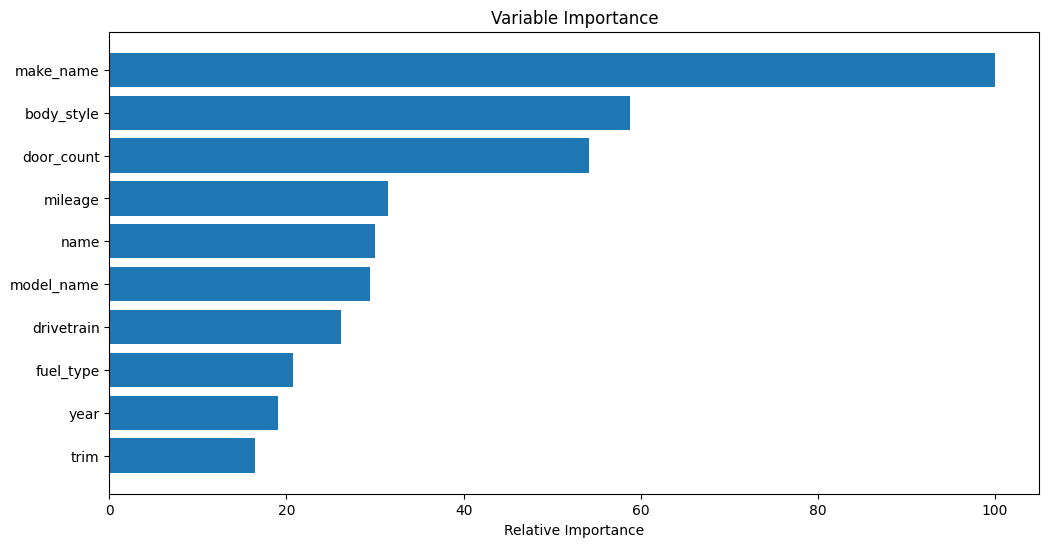

In [18]:
import numpy as np
import matplotlib.pyplot as plt
feature_importance = xgb.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sorted_idx = sorted_idx[-10:]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
cols=np.array(['name','make_name','model_name','fuel_type', 'transmission', 'drivetrain', 'normalized_color_exterior', 
        'normalized_color_interior', 'door_count', 'body_style', 'mileage', 'trim', 'year'])
plt.yticks(pos, cols[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()